# Modelo como microservicio con Flask y versionado con MLFlow

En esta notebook se pretende registrar el modelo creado en MLflow. Para ello, será necesario tener un entorno virtual con MLflow y su interfaz de usuario. Además, también crearemos un microservicio para este modelo utilizando la opción POST de Flask. Para esto, deberemos antes exportar el modelo creado anteriormente utilizando pickle.

### Imports y lectura del modelo

In [9]:
#IMPORTS
from flask import Flask, request, jsonify
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [7]:
# Variables
asset = "apple"
model_filename = 'resources/apple_ridge_model.pkl'

In [10]:
### LECTURA DEL MODELO
with open(model_filename, 'rb') as file:
    ridge_model = pickle.load(file)

E:\Anaconda\envs\mlflow_env\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator Ridge from version 1.3.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Registrar el primer modelo en MLFlow

Se ha registrado el modelo directamente a través del cliente.

El pantallazo será añadido en el word del trabajo final.

In [12]:
experiment_name = f"{asset}_JimenezJuan"
mlflow.set_experiment(experiment_name)

with mlflow.start_run() as run:
    mlflow.sklearn.log_model(ridge_model, "model")
    
    run_id = run.info.run_id


client = MlflowClient()

model_name = experiment_name

try:
    client.create_registered_model(model_name)
except mlflow.exceptions.MlflowException as e:
    if f"Registered Model (name={model_name}) already exists" in str(e):
        print(f"El modelo {model_name} ya existe. Creamos una nueva versión del mismo.")
    else:
        raise e

client.create_model_version(
    name=model_name,
    source=f"runs:/{run_id}/model",
    run_id=run_id
)

E:\Anaconda\envs\mlflow_env\lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<ModelVersion: aliases=[], creation_timestamp=1725817406768, current_stage='None', description=None, last_updated_timestamp=1725817406768, name='apple_JimenezJuan', run_id='a564643f6a224a55a0277e9070b2fdb8', run_link=None, source='runs:/a564643f6a224a55a0277e9070b2fdb8/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

### PANTALLAZO DEL UI - MODELO CREADO - PRIMERA VERSIÓN
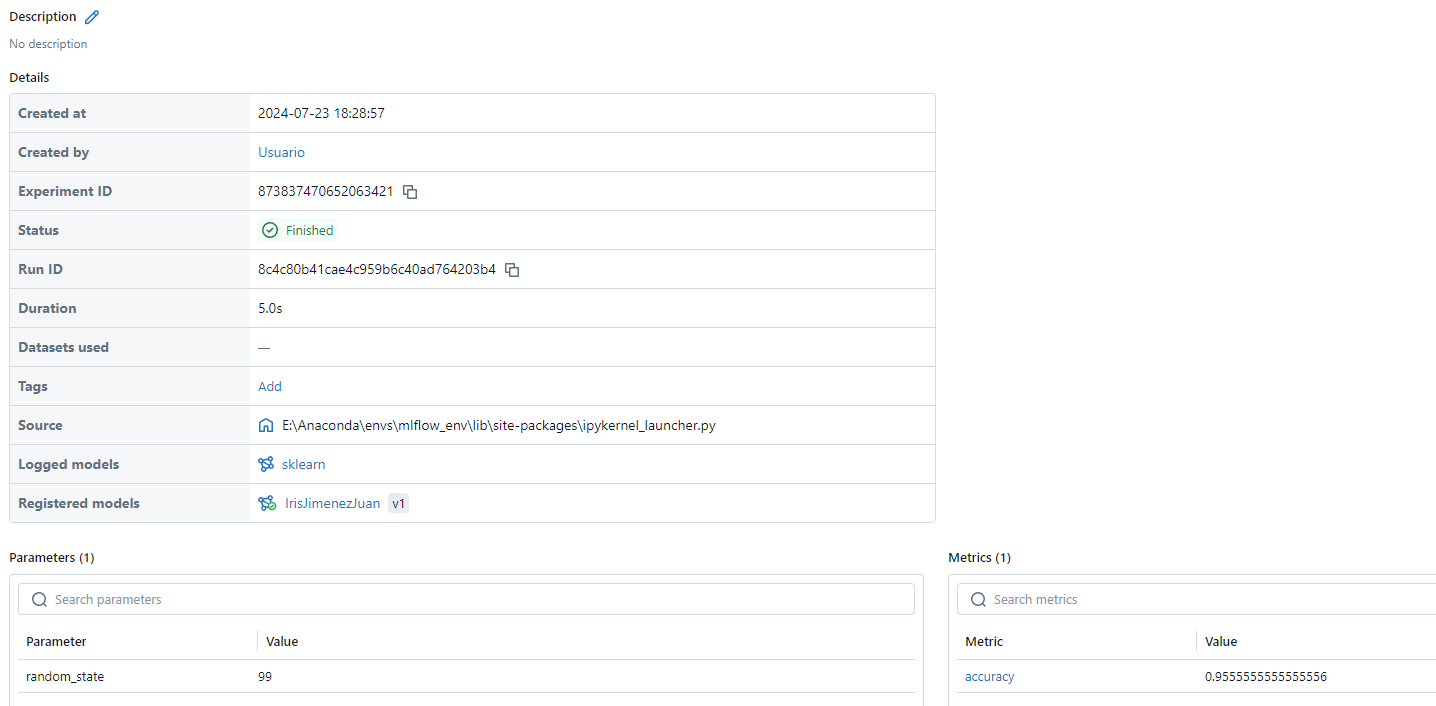

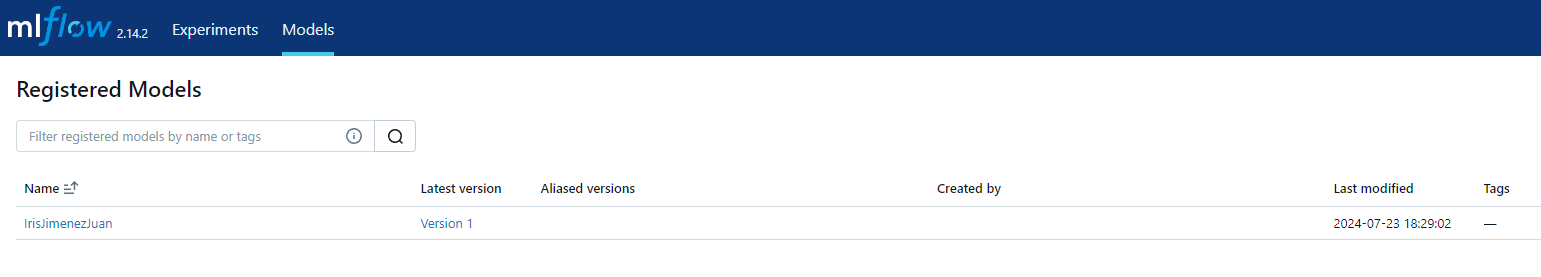

## Microservicio utilizando Flask

Ahora se recupera la última versión del modelo que acabamos de registrar. Dado esto, lo ejecutaremos como un microservicio con el puerto fijado en 8080 y lo llamaremos desde una consola utilizando CURL. De este modo probaremos la eficacia de este microservicio y del modelo. De nuevo, la captura será añadida al word.

In [13]:
latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version
model_uri = f"models:/{model_name}/{latest_version}"
model = mlflow.sklearn.load_model(model_uri)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    """Realiza predicciones usando el modelo de MLflow previamente registrado.

    La función espera recibir una solicitud POST con un JSON que contiene una lista de listas
    de valores numéricos bajo la clave 'data'. Devuelve las predicciones como un JSON.

    Returns:
        Response: Un objeto JSON que contiene las predicciones o un mensaje de error.

    Raises:
        ValueError: Si la entrada no contiene la clave 'data' o si no es una lista de listas.
    """
    try:
        data = request.get_json(force=True)

        if 'data' not in data or not isinstance(data['data'], list):
            raise ValueError("La entrada debe ser un JSON con una clave 'data' que contenga una lista de listas de valores numéricos.")

        input_data = pd.DataFrame(data['data'])

        predictions = model.predict(input_data)

        predictions_list = predictions.tolist()
        
        return jsonify(predictions=predictions_list)
    except Exception as e:
        return jsonify(error=str(e))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12636\179200464.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version


In [ ]:
if __name__ == '__main__':
    app.run(port=8080)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [08/Sep/2024 19:46:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:46:57] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:47:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:47:20] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:47:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:48:22] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:48:42] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:48:53] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:05] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:14] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:22] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:35] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Sep/2024 19:49:50] "POST /predict HTTP/1.

### PANTALLAZO DEL ESTUDIANTE
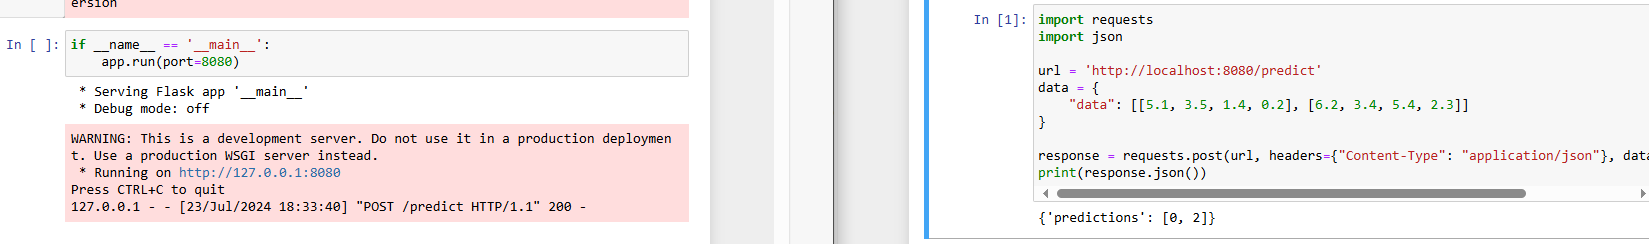